In [1]:
import uproot
import numpy as np
import sys

sigProcPath = "/Users/scarpell/Desktop/ICARUS/src/signal_processing/icarus-sigproc-tools"
sys.path.insert(0,sigProcPath)

PATHNAME       = "/Users/scarpell/Desktop/ICARUS/src/signal_processing/"
PATHTODATA     = "data/noise/"
RECOFILENAME   = PATHNAME + PATHTODATA + "/data_dl1_run822_201_20200109T010140_dl3_20200128T175402-DUMMY.root"

# Below should be standard for the test data files currently available
RECOFOLDERNAME = "Events"
DAQNAME        = "raw::RawDigits_daq__DUMMY."

In [2]:
# Acquire the raw event
event = 1

from sigproc_tools.sigproc_objects.rawdigit import RawDigit

print("Opening file: ",RECOFILENAME)
data_file = uproot.open(RECOFILENAME)

print("Opening the folder contianing the RawDigits information: ",RECOFOLDERNAME)
events_folder = data_file[RECOFOLDERNAME]

rawdigits = RawDigit(events_folder,DAQNAME)
rawWaveform = rawdigits.getWaveforms(event)

Opening file:  /Users/scarpell/Desktop/ICARUS/src/signal_processing/data/noise//data_dl1_run822_201_20200109T010140_dl3_20200128T175402-DUMMY.root
Opening the folder contianing the RawDigits information:  Events


In [3]:
#Remove median baseline and RMS
from sigproc_tools.sigproc_functions.noiseProcessing import getPedestalsAndRMS

waveforms, pedestal, rms = getPedestalsAndRMS(rawWaveform)

#identify the null entries
empty=[ i for i, waveform in enumerate(waveforms) if np.all(waveform==0) ]

print(len(empty))
print(len(waveforms))

576
4608


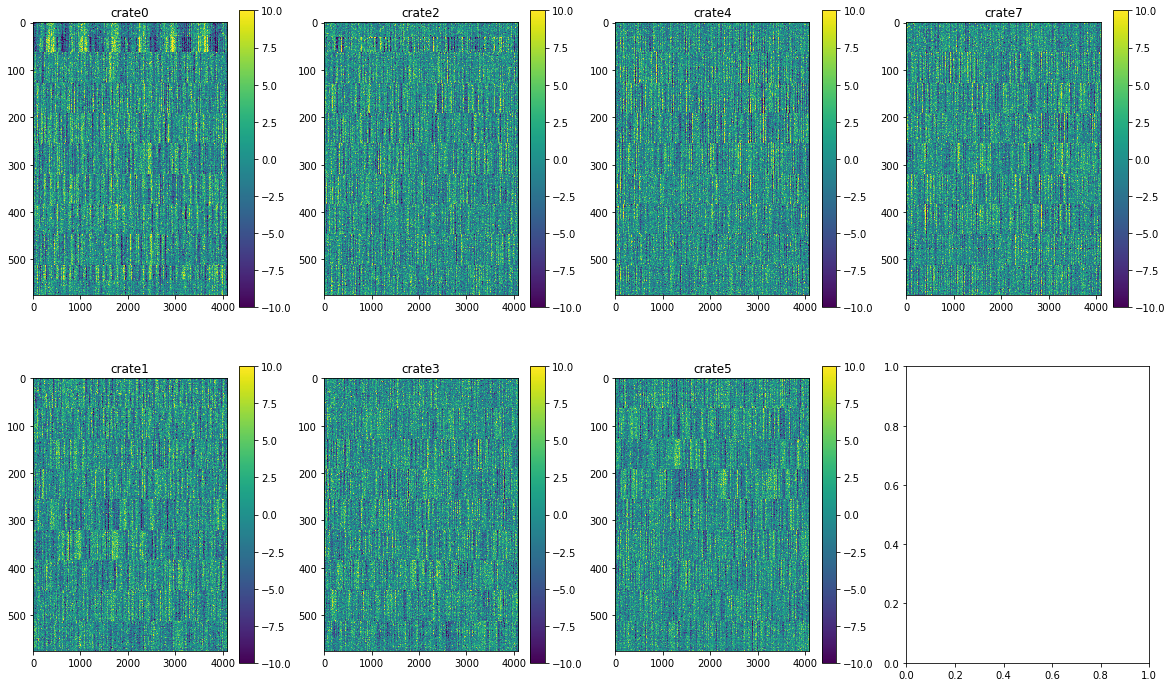

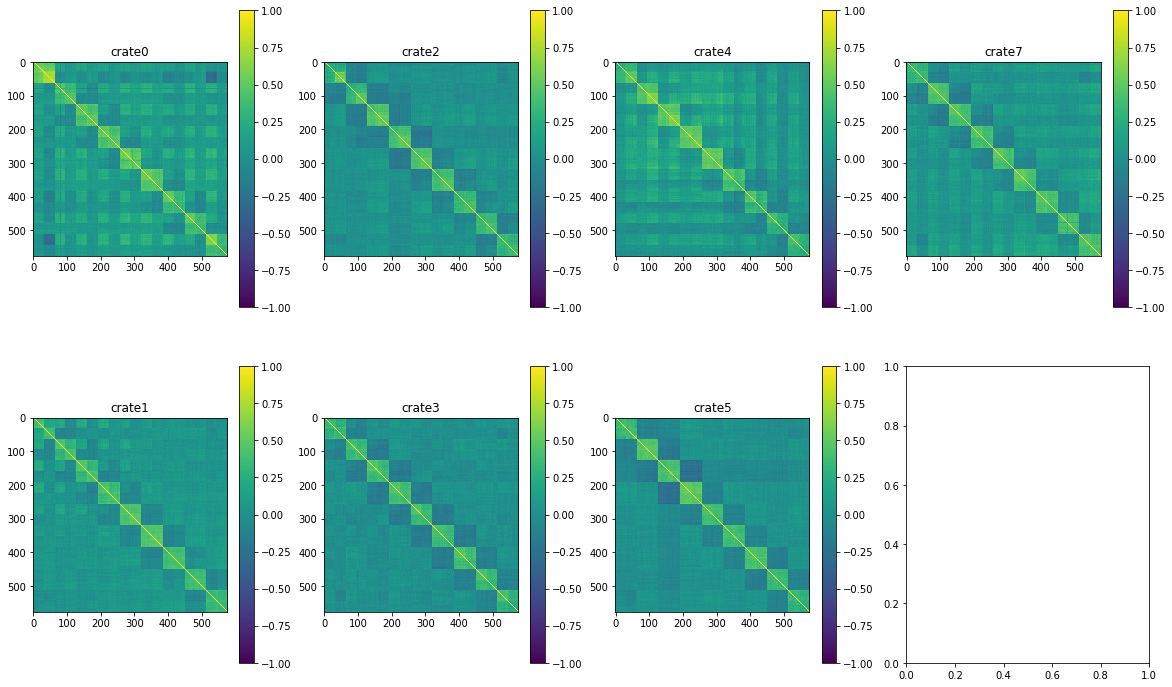

In [5]:
#study each of the 8 minicrate independently

from sigproc_tools.sigproc_objects.minicrate import MiniCrate

labels = [ 'crate'+str(i) for i in range(8) ]
labels.remove('crate6') #not working

#save the crates in a dictionaly
crates = { label : MiniCrate( int(label[-1]), waveforms ) for label in labels }


#Make some plots 

import matplotlib.pyplot as plt

fig, ax = plt.subplots( 2,4, figsize=(20,12) )

for i, (label, crate) in enumerate(crates.items()):

    axis = ax[i%2][int(i/2)]
    
    axis.set_title(label)
    out =axis.imshow(crate._waveforms, vmin=-10, vmax=10, aspect = 10)
    fig.colorbar(out, ax=axis)


#Plot the correlations in each crate
fig, ax = plt.subplots( 2,4, figsize=(20,12) )

for i, (label, crate) in enumerate(crates.items()):

    axis = ax[i%2][int(i/2)]
    
    axis.set_title(label)
    out =axis.imshow(crate._doCorrelation(), vmin=-1, vmax=1)
    fig.colorbar(out, ax=axis)
    
plt.show()